<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Renatta Garcia Sanchez, Juan Enrique Aguirre López

**Fecha:**  15 de octubre del 2020.

**Expediente** : 703275 ,722664 
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Liga repositorio:** https://github.com/renattaGS/Tareas_simproc_aguirre_garcia

# Tarea 4: Clase 13

### Problema 1
>1.Suponer que $T$ distribuye beta donde la media es $\mu_p$ y varianza $\sigma_p^2$ y responder cual es la probabilidad $P(T\leq d)$.
    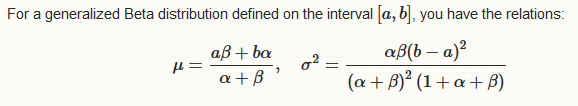

> **Ayuda**: - Aprender a utlizar el solucionador de ecuaciones no lineales https://stackoverflow.com/questions/19843116/passing-arguments-to-fsolve
- Leer el help de la función beta del paquete estadístico para aprender a graficar funciones beta en un intervalo diferente a 0 y 1.



## Solución Juan Enrique 

In [1]:
# Importamos librerías a trabajar en todas las simulaciones
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st     # Librería estadística
from math import factorial as fac # Importo la operación factorial
from scipy.special import comb # Importamos la función combinatoria

%matplotlib inline
from scipy.optimize import fsolve

In [265]:
def alpbet(yz):
    alpha = yz[0]
    beta = yz[1]
    up = 44; sigma = np.sqrt(9); a = 40; b = 49
    f1 = ((a*beta + b*alpha)/(alpha+beta))-up
    f2 = ((alpha*beta*((b-a)**2)) / (((alpha+beta)**2)*(1+alpha+beta))) - sigma**2
    return np.array([f1,f2])

yz0 = np.array([1,1])
yz = fsolve(alpbet, yz0)
yz

array([0.54320988, 0.67901235])

In [266]:
######### Caso de estudio 2 ################
up = 44; sigma = np.sqrt(9); d = 47; a = 40; b = 49
P2 = st.beta.cdf(d, yz[0], yz[1], scale=(b-a), loc=a)
print('P(T<=d)=',P2)

P(T<=d)= 0.7677251926284654


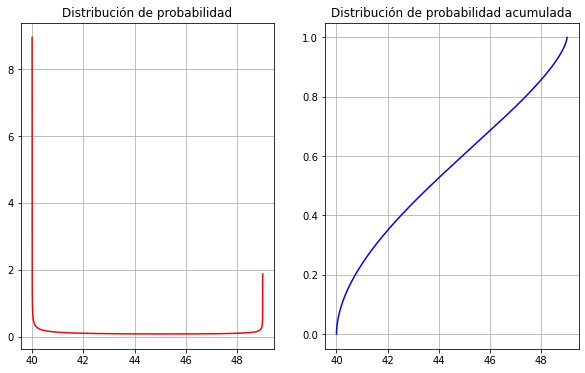

In [273]:
x = np.linspace(a,b, 100000)
y_acum = st.beta.cdf(x, yz[0], yz[1], scale=(b-a), loc=a)
y = st.beta.pdf(x, yz[0], yz[1], scale=(b-a), loc=a)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
ax1.plot(x, y, 'r-')
ax1.grid()
ax1.set_title('Distribución de probabilidad')
ax2.plot(x, y_acum, 'b-')
ax2.grid()
ax2.set_title('Distribución de probabilidad acumulada')
plt.show()

## Solución Renatta 

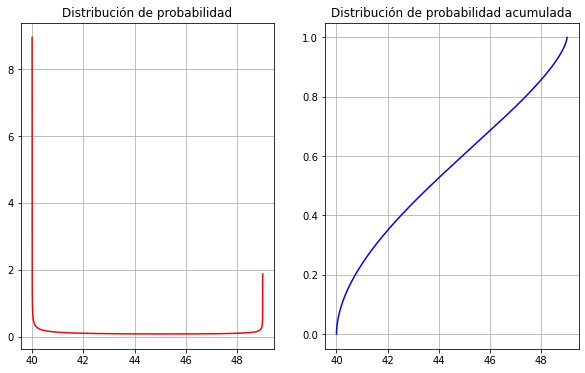

In [10]:
from scipy.optimize import fsolve
import scipy.stats as st 
import numpy as np
import matplotlib.pyplot as plt

miu = 44 #media del proceso
sigma = 3 #desvest del proceso
d = 47 #valor sobre el que queremos calcular la probabilidad
a=40
b=49 #a y b son los límites inferior y superior sobre el que calcularemos la función beta

def Beta(x: 'Vector de valores para alpha y beta'):
    'Esta función se utiliza para conocer los parámetros alpha y beta, dadas miu y sigma'
    return [miu-((a*x[0]+b*x[1])/(x[1]+x[0])),
            sigma**2-((x[1]*x[0]*(b-a)**2)/(((x[1]+x[0])**2)*(1+x[1]+x[0])))]
    
beta_alpha=fsolve(Beta, [1,1])

x = np.linspace(a,b, 100000)
y_acum = st.beta.cdf(x,beta_alpha[1], beta_alpha[0], scale=(b-a), loc=a)
y=st.beta.pdf(x,beta_alpha[1], beta_alpha[0], scale=(b-a), loc=a)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
ax1.plot(x, y, 'r-')
ax1.grid()
ax1.set_title('Distribución de probabilidad')
ax2.plot(x, y_acum, 'b-')
ax2.grid()
ax2.set_title('Distribución de probabilidad acumulada')
plt.show()


In [15]:
p_47=st.beta.cdf(d,beta_alpha[1], beta_alpha[0], scale=(b-a), loc=a)
print("La probabilidad de P(T <= d)", p_47*100, "%" )

La probabilidad de P(T <= d) 76.77251926284654  %


### Problema 2
>2.Suponer que $T$ distribuye triangular donde el valor mas probable es $\mu_p$ el valor pesimista es $p=49$ y el valor optimista es $o=40$ y responder cual es la probabilidad $P(T\leq d)$. Nuevamente aprender a graficar una función triangular en un intervalro [a,b], usando el help.


## Solución Juan Enrique 

In [286]:
def disttri(inicio):
    a = inicio[0]
    b = inicio[1]
    c = inicio[2]
    up = 44; sigma = np.sqrt(9)
    f1 = ((a+b+c)/ 3)-up
    f2 = ((a**2 + b**2 + c**2 - (a*b) - (a*c) - (b*c))/18) - sigma**2
    f3 = c - up
    return np.array([f1,f2,f3])

inicio0 = np.array([0,0,0])
inicio = fsolve(disttri, inicio0)
inicio

array([36.65153077, 51.34846923, 44.        ])

In [295]:
up = 44; sigma = np.sqrt(9); d = 47; a = 40; b = 49;c1 = (inicio[2]-a)/(b-a)
P3 = st.triang.cdf(d, c1, loc=a, scale=(b-a))
print('P(T<=d)=',P3)

P(T<=d)= 0.9111111111111111


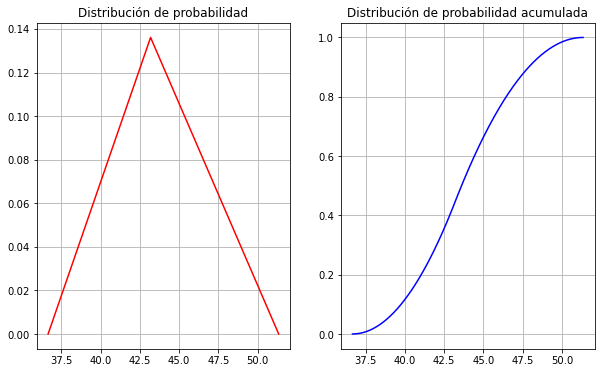

In [297]:
a_new = inicio[0]; b_new = inicio[1]
x2 = np.linspace(a_new,b_new, 100000)
y_acum2 = st.triang.cdf(x2, c1, loc=a_new, scale=(b_new-a_new))
y2 = st.triang.pdf(x2, c1, loc=a_new, scale=(b_new-a_new))

fig, (ax11, ax21) = plt.subplots(1, 2, figsize=(10,6))
ax11.plot(x2, y2, 'r-')
ax11.grid()
ax11.set_title('Distribución de probabilidad')
ax21.plot(x2, y_acum2, 'b-')
ax21.grid()
ax21.set_title('Distribución de probabilidad acumulada')
plt.show()

## Solución Renatta 